#  Classification de Fleurs avec CNN Simple
## Projet Deep Learning - Dataset Flowers



## 1 Importation des bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import classification_report, confusion_matrix

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU disponible: {tf.config.list_physical_devices('GPU')}")

TensorFlow version: 2.19.0
GPU disponible: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


###  Configuration du projet

In [2]:
from google.colab import files

print(" Upload ton fichier 'flowers.zip' maintenant...")
uploaded = files.upload()
print(" Upload terminé!")

 Upload ton fichier 'flowers.zip' maintenant...


Saving archive (14).zip to archive (14).zip
 Upload terminé!


In [3]:
import zipfile
zip_file = list(uploaded.keys())[0]

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('dataset')

print(" Dataset extrait!")
print("\n Structure du dataset:")
!ls -R dataset/

 Dataset extrait!

 Structure du dataset:
dataset/:
flowers

dataset/flowers:
daisy  dandelion  rose	sunflower  tulip

dataset/flowers/daisy:
100080576_f52e8ee070_n.jpg    34571214621_f655295459_n.jpg
10140303196_b88d3d6cec.jpg    34585331601_837dbe5254_n.jpg
10172379554_b296050f82_n.jpg  34585995071_13e07140d8_n.jpg
10172567486_2748826a8b.jpg    34590677231_0ed33ccd55_n.jpg
10172636503_21bededa75_n.jpg  34591991761_16fc5c9c00_n.jpg
102841525_bd6628ae3c.jpg      34602180741_cf2f671ba5_n.jpg
10300722094_28fa978807_n.jpg  34611565966_9de274f987_n.jpg
1031799732_e7f4008c03.jpg     34613530216_26cf037012_n.jpg
10391248763_1d16681106_n.jpg  3463313493_9497aa47e5_n.jpg
10437754174_22ec990b77_m.jpg  34637394046_f85541735d_n.jpg
10437770546_8bb6f7bdd3_m.jpg  34637970155_a2b917077c_n.jpg
10437929963_bc13eebe0c.jpg    34638378196_216d5bbc2e_n.jpg
10466290366_cc72e33532.jpg    34643914016_2e659d6e82_n.jpg
10466558316_a7198b87e2.jpg    34652819496_0b6f758986_n.jpg
10555749515_13a12a026e.jpg    346

In [16]:

DATA_PATH ='dataset/flowers'

IMG_SIZE = 128
BATCH_SIZE = 32
EPOCHS = 30
LEARNING_RATE = 0.001

CLASSES = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
NUM_CLASSES = len(CLASSES)

print(f" Configuration:")
print(f"   - Image size: {IMG_SIZE}x{IMG_SIZE}")
print(f"   - Batch size: {BATCH_SIZE}")
print(f"   - Epochs: {EPOCHS}")
print(f"   - Classes: {CLASSES}")

 Configuration:
   - Image size: 128x128
   - Batch size: 32
   - Epochs: 30
   - Classes: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


## 3️ Chargement et préparation des données

###  Concepts mathématiques:
- **Normalisation**: On divise les pixels par 255 pour avoir des valeurs entre [0,1]
- **Data Augmentation**: Augmente artificiellement la taille du dataset

In [18]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2
)


train_generator = train_datagen.flow_from_directory(
    DATA_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)


validation_generator = train_datagen.flow_from_directory(
    DATA_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

print(f"\n Données chargées:")
print(f"   - Training samples: {train_generator.samples}")
print(f"   - Validation samples: {validation_generator.samples}")

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.

 Données chargées:
   - Training samples: 3457
   - Validation samples: 860


## 4️ Visualisation des données

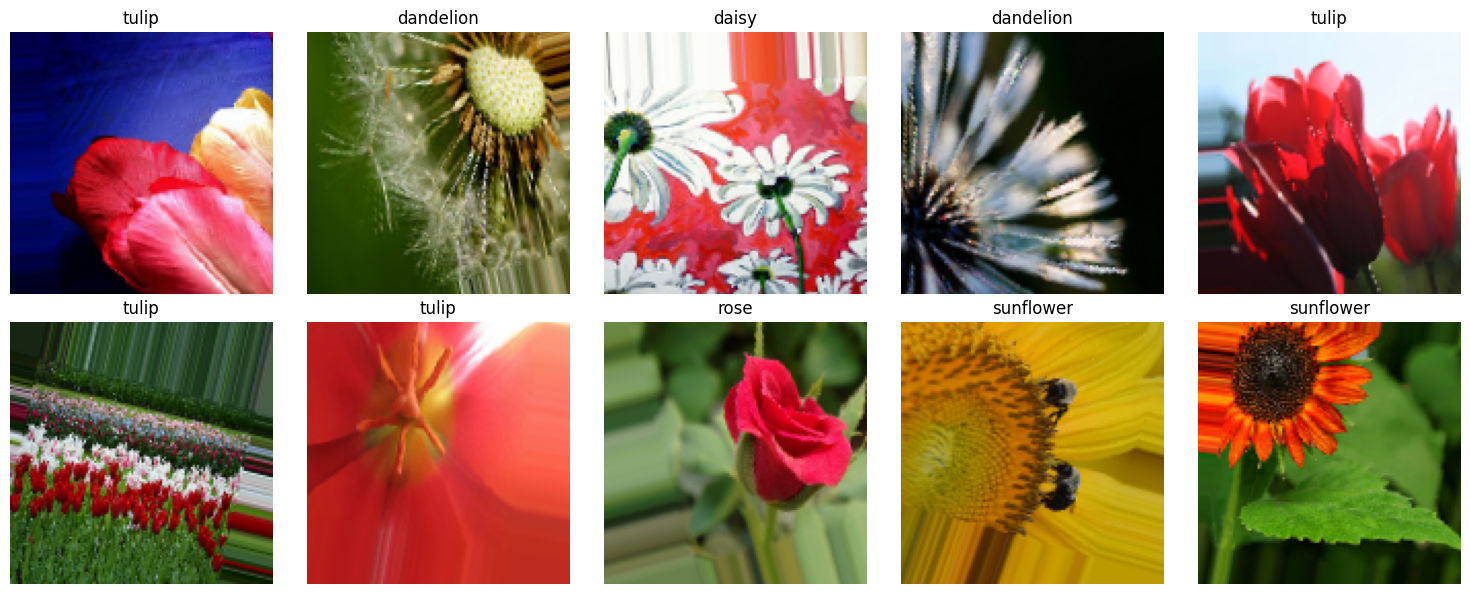

In [19]:

plt.figure(figsize=(15, 6))
images, labels = next(train_generator)

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    class_idx = np.argmax(labels[i])
    plt.title(CLASSES[class_idx])
    plt.axis('off')

plt.tight_layout()
plt.show()

## 5 Construction du modèle CNN

###  Architecture mathématique:

**Convolution 2D:**
$$
y[i,j] = \sum_{m,n} x[i+m, j+n] \cdot w[m,n] + b
$$

**MaxPooling:**
$$
y[i,j] = \max_{m,n \in window} x[i+m, j+n]
$$

**ReLU Activation:**
$$
f(x) = \max(0, x)
$$

**Softmax (sortie):**
$$
softmax(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{K} e^{x_j}}
$$

In [20]:
def create_cnn_model():

    model = models.Sequential([

        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        layers.MaxPooling2D((2, 2)),


        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),


        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),


        layers.Flatten(),


        layers.Dropout(0.5),


        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),


        layers.Dense(NUM_CLASSES, activation='softmax')
    ])

    return model
model = create_cnn_model()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,422,021 (5.42 MB)

 Trainable params: 1,422,021 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

## 6 Compilation du modèle

###  Fonction de perte (Loss):

**Categorical Crossentropy:**
$$
L = -\sum_{i=1}^{K} y_i \log(\hat{y}_i)
$$

où:
- $y_i$ = vraie classe (one-hot encoded)
- $\hat{y}_i$ = prédiction du modèle

In [21]:

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(" Modèle compilé avec succès!")

 Modèle compilé avec succès!


## 7️⃣ Callbacks pour l'entraînement

In [22]:

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)
=
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

callbacks = [early_stop, reduce_lr]

print(" Callbacks configurés!")

 Callbacks configurés!


## 8 Entraînement du modèle

###  Processus mathématique:

**Backpropagation:**
$$
w_{new} = w_{old} - \alpha \frac{\partial L}{\partial w}
$$

où:
- $\alpha$ = learning rate
- $\frac{\partial L}{\partial w}$ = gradient de la loss par rapport aux poids

In [23]:

print(" Début de l'entraînement...\n")

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=callbacks,
    verbose=1
)

print("\n Entraînement terminé!")

 Début de l'entraînement...



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 35s 264ms/step - accuracy: 0.2806 - loss: 1.5272 - val_accuracy: 0.4651 - val_loss: 1.2004 - learning_rate: 0.0010
Epoch 2/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 24s 220ms/step - accuracy: 0.4909 - loss: 1.1971 - val_accuracy: 0.5430 - val_loss: 1.0826 - learning_rate: 0.0010
Epoch 3/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 25s 228ms/step - accuracy: 0.5428 - loss: 1.1025 - val_accuracy: 0.6012 - val_loss: 0.9917 - learning_rate: 0.0010
Epoch 4/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 23s 215ms/step - accuracy: 0.6024 - loss: 0.9919 - val_accuracy: 0.6419 - val_loss: 0.9319 - learning_rate: 0.0010
Epoch 5/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 23s 207ms/step - accuracy: 0.6407 - loss: 0.9179 - val_accuracy: 0.6430 - val_loss: 0.8844 - learning_rate: 0.0010
Epoch 6/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 23s 215ms/step - accuracy: 0.6464 - loss: 0.9099 - val_accuracy: 0.6233 - val_loss: 0.9050 - learning_rate: 0.0010
Epoch 7/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 23s 214ms/step - accuracy: 0.6

## 9 Visualisation des résultats d'entraînement

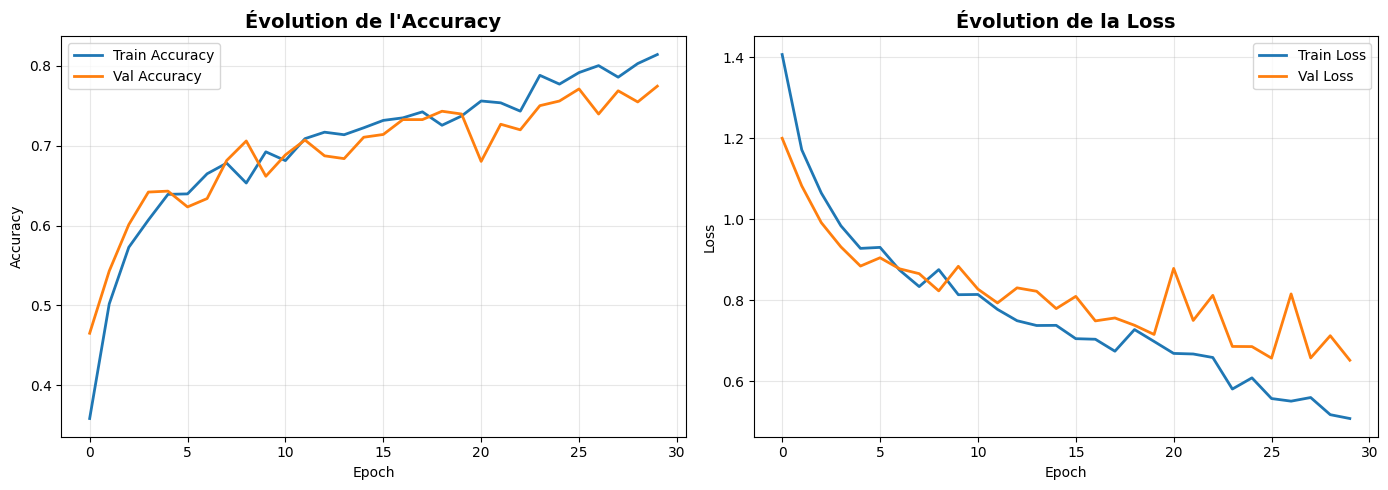


 Résultats finaux:
   - Train Accuracy: 0.8140 (81.40%)
   - Validation Accuracy: 0.7744 (77.44%)


In [24]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
axes[0].set_title('Évolution de l\'Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)


axes[1].plot(history.history['loss'], label='Train Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
axes[1].set_title('Évolution de la Loss', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\n Résultats finaux:")
print(f"   - Train Accuracy: {final_train_acc:.4f} ({final_train_acc*100:.2f}%)")
print(f"   - Validation Accuracy: {final_val_acc:.4f} ({final_val_acc*100:.2f}%)")

##  Évaluation détaillée

27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step

 Classification Report:
              precision    recall  f1-score   support

       daisy       0.88      0.80      0.83       152
   dandelion       0.83      0.80      0.81       210
        rose       0.66      0.69      0.68       156
   sunflower       0.74      0.86      0.79       146
       tulip       0.76      0.73      0.75       196

    accuracy                           0.77       860
   macro avg       0.77      0.77      0.77       860
weighted avg       0.78      0.77      0.77       860



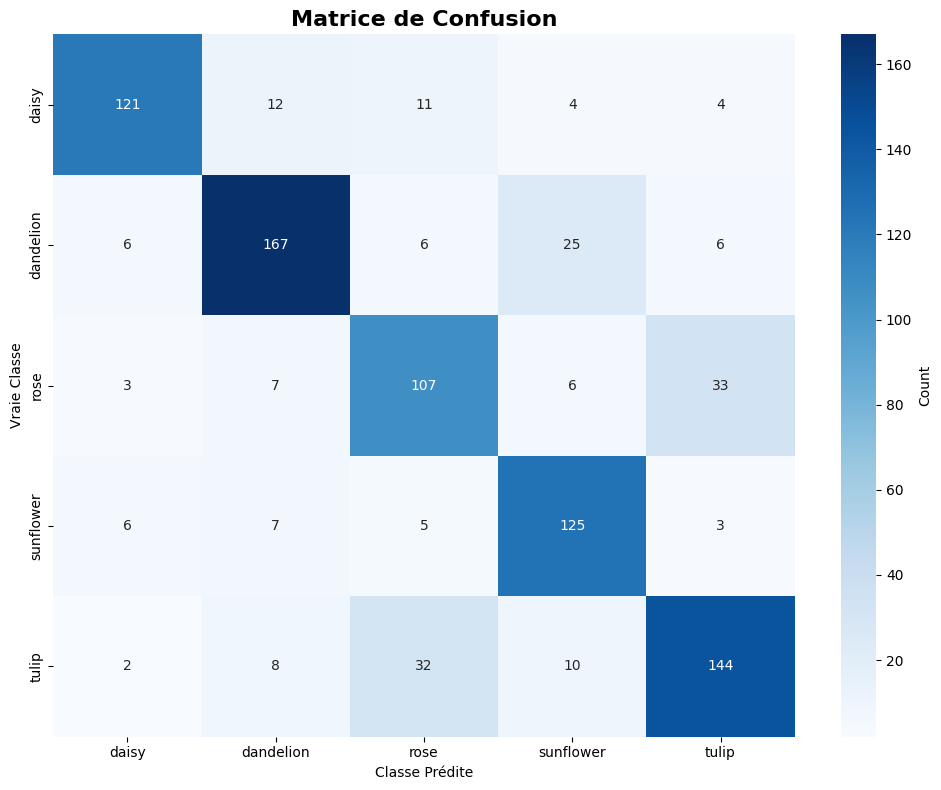

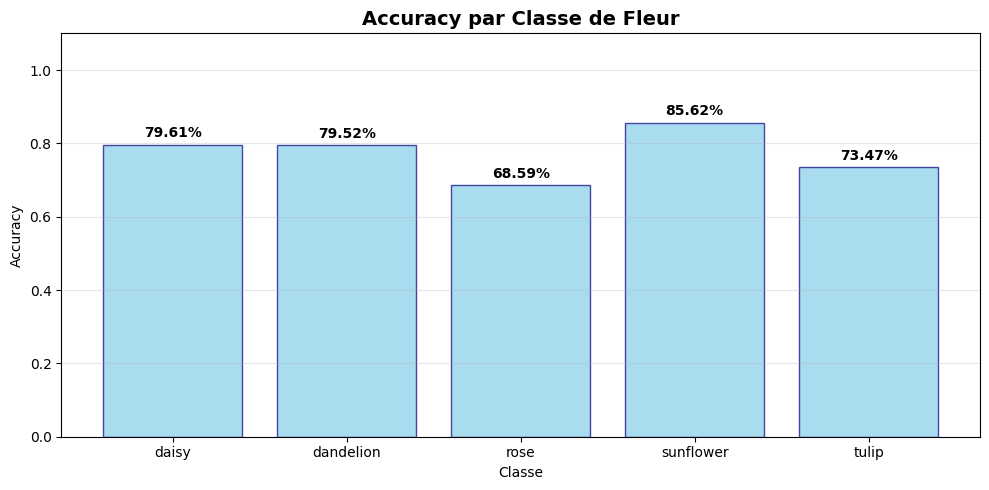

In [25]:

validation_generator.reset()
predictions = model.predict(validation_generator, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = validation_generator.classes


print("\n Classification Report:")
print("=" * 60)
print(classification_report(y_true, y_pred, target_names=CLASSES))


cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=CLASSES, yticklabels=CLASSES,
            cbar_kws={'label': 'Count'})
plt.title('Matrice de Confusion', fontsize=16, fontweight='bold')
plt.ylabel('Vraie Classe')
plt.xlabel('Classe Prédite')
plt.tight_layout()
plt.show()


class_accuracy = cm.diagonal() / cm.sum(axis=1)

plt.figure(figsize=(10, 5))
plt.bar(CLASSES, class_accuracy, color='skyblue', edgecolor='navy', alpha=0.7)
plt.title('Accuracy par Classe de Fleur', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy')
plt.xlabel('Classe')
plt.ylim([0, 1.1])
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(class_accuracy):
    plt.text(i, v + 0.02, f'{v:.2%}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

## 1️⃣1️⃣ Prédictions sur nouvelles images

In [27]:

def predict_flower(image_path, model):
    """
    Prédit la classe d'une image de fleur
    """
    from tensorflow.keras.preprocessing import image


    img = image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0


    predictions = model.predict(img_array, verbose=0)
    predicted_class = CLASSES[np.argmax(predictions)]
    confidence = np.max(predictions) * 100


    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Prédiction: {predicted_class}\nConfiance: {confidence:.2f}%',
              fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    print("\n Probabilités par classe:")
    for i, flower in enumerate(CLASSES):
        prob = predictions[0][i] * 100
        print(f"   {flower:12s}: {prob:6.2f}%")

    return predicted_class, confidence


## 12 Sauvegarde du modèle

In [28]:

model.save('flower_classifier_model.h5')
print("Modèle sauvegardé: flower_classifier_model.h5")



Modèle sauvegardé: flower_classifier_model.h5


##  Résumé du Projet

### Architecture utilisée:
- **4 blocs de convolution** (32, 64, 128, 128 filtres)
- **MaxPooling** après chaque convolution
- **Dropout** (0.5 et 0.3) pour éviter l'overfitting
- **Dense layer** (256 neurones)
- **Softmax** pour classification multi-classe

### Concepts mathématiques appliqués:
1. **Convolution 2D** - Extraction de features
2. **MaxPooling** - Réduction dimensionnelle
3. **ReLU** - Activation non-linéaire
4. **Dropout** - Régularisation
5. **Softmax** - Probabilités de sortie
6. **Categorical Crossentropy** - Fonction de perte
7. **Backpropagation** - Optimisation des poids
8. **Adam Optimizer** - Mise à jour adaptative des poids

### Résultats attendus:
- Accuracy: **80-90%**
- Performance: Rapide et efficace
- Overfitting: Contrôlé avec Dropout et Data Augmentation

---
